# 0. required packages for h5py

In [9]:
%run "C:\Users\puzheng\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

11748


# 1. Create field-of-view class

In [10]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_1\20201205-proB_Dox_IAA_STI+_CTP-08',
             'save_folder':r'W:\Pu_Temp\20201215-proB_dox-iaa-sti+',
             'experiment_type': 'DNA',
             'num_threads': 20,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210203-Corrections_3color_35',
             'shared_parameters':{
                     'single_im_size':[35,2048,2048],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':500,
                     'max_num_seeds': 2500,
                     'spot_seeding_th':125,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [37]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=4,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 58
- Number of field of views: 81
- Importing csv file: \\10.245.74.158\Chromatin_NAS_1\20201205-proB_Dox_IAA_STI+_CTP-08\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 51 folders are found according to color-usage annotation.
+ loading fov_info from file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_04.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 4.555s.
+ loading correction from file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_04.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_04

### 2. Process image into candidate spots

In [38]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 51 folders
-- checking unique, region:[41 42 43] in 0.098s.
-- checking unique, region:[44 45 46] in 0.213s.
-- checking unique, region:[47 48 49] in 0.042s.
-- checking unique, region:[50 51 52] in 0.021s.
-- checking unique, region:[53 54 55] in 0.020s.
-- checking unique, region:[56 57 59] in 0.020s.
-- checking unique, region:[60 61 62] in 0.020s.
-- checking unique, region:[63 64 65] in 0.010s.
-- checking unique, region:[66 67 68] in 0.018s.
-- checking unique, region:[69 70 71] in 0.014s.
-- checking unique, region:[72 73 74] in 0.008s.
-- checking unique, region:[75 76 77] in 0.019s.
-- checking unique, region:[78 79 80] in 0.011s.
-- checking unique, region:[81 82 83] in 0.011s.
-- checking unique, region:[84 85 86] in 0.011s.
-- checking unique, region:[87 88 89] in 0.016s.
-- checking unique, region:[90 91 92] in 0.030s.
-- checking unique, region:[93 94 95] in 0.020s.
-- checking unique, region:[323 321 328] in 0.020s.
-- checking

# 3. Find chromosomes

## 3.1 load chromosome image

In [9]:
chrom_im = fov._load_chromosome_image(_type='forward', _overwrite=False)

-- choose chrom images from folder: \.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20201205-proB_Dox_IAA_STI+_CTP-08\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_35_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_35_2048_2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20201205-proB_Dox_IAA_STI+_CTP-08\H0R0\Conv_zscan_03.dax  in 4.757s
-- removing hot pixels for channels:['750'] in 9.312s
-- illumination correction for channels: 750, in 1.815s
-- warp image with chromatic correction for channels: ['750'] and drift:[0. 0. 0.] 750, in 93.220s
-- finish correction in 120.955s
-- chromosome image has drift: [0. 0. 0.]
-- saving fov_info to file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_03.hdf5
++ base attributes saved:['chrom_im'] in 20.698s.


## 3.2 find candidate chromosomes

In [10]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4,
                                                               _binary_per_th=99.5, 
                                                               _morphology_size=2,
                                                               _overwrite=True)

-- adjust seed image with filter size=4
-- binarize image with threshold: 99.5%
-- erosion and dialation with size=2.
-- find close objects.
-- random walk segmentation, beta=10.


C:\Users\puzheng\Documents\ImageAnalysis3\segmentation_tools\chromosome.py:79: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  _seg_label = random_walker(adj_chrom_im, _label, beta=10, mode='cg_mg')


-- find objects larger than size=50
-- 380 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 20 threads in 219.760s.
-- saving fov_info to file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_03.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.028s.


## 3.3 select among candidate chromosomes

In [11]:
chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.5,
                                                         _cand_spot_intensity_th=200,
                                                         _save=True, 
                                                         _overwrite=True)

+ loading unique from file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_03.hdf5
++ finish loading unique in 0.037s. 
- start select from 380 chromosomes with loss threshold=0.5


C:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


-- remove chr id 2, percentage of lost rounds:0.778.
-- remove chr id 73, percentage of lost rounds:0.625.
-- remove chr id 307, percentage of lost rounds:0.556.
-- remove chr id 244, percentage of lost rounds:0.535.
-- remove chr id 324, percentage of lost rounds:0.514.
-- 375 chromosomes are kept.
-- saving fov_info to file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_03.hdf5
++ base attributes saved:['chrom_coords'] in 0.100s.


### visualize chromosomes selections

<IPython.core.display.Javascript object>


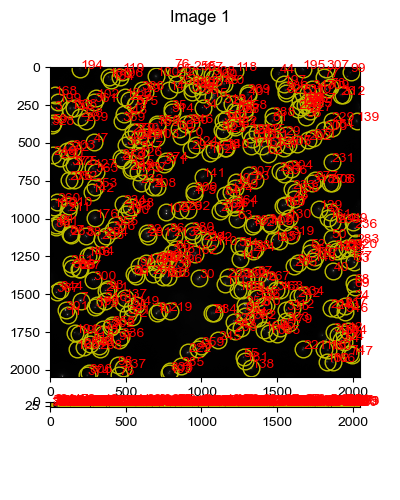

In [12]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


## select spots based on chromosomes

In [39]:
fov._load_from_file('unique')

+ loading unique from file: W:\Pu_Temp\20201215-proB_dox-iaa-sti+\Conv_zscan_04.hdf5
++ finish loading unique in 0.036s. 


C:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1435: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [132]:
## assign spots to chromosomes
intensity_th = 200
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 331


In [145]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids
dna_reg_channels = fov.unique_channels
chrom_coords = fov.chrom_coords


# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 3000nm
good_chr_th = 0.8 # 80% of regions should have candidate spots

sel_dna_cand_hzxys_list = []
sel_chrom_coords = []
chr_cand_pers = []
sel_chr_cand_pers = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _chr_cand_per = 0
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th)])
            _chr_cand_per += 1
    
    _chr_cand_per *= 1/len(_cand_hzxys)
    # append
    if _chr_cand_per >= good_chr_th:
        sel_dna_cand_hzxys_list.append(_sel_cands_list)
        sel_chrom_coords.append(_chrom_coord)
        sel_chr_cand_pers.append(_chr_cand_per)
    
    chr_cand_pers.append(_chr_cand_per)
    
print(f"kept chromosomes: {len(sel_chrom_coords)}")

kept chromosomes: 297


In [152]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list[:nkeep])


_sel_hzxys, _sel_scores, _cand_scores = \
_maximize_score_spot_picking_of_chr(sel_dna_cand_hzxys_list[0], dna_reg_ids, 
                                    init_dna_hzxys[0], dna_reg_ids,
                                    ref_ct_dists, ref_local_dists, ref_ints,
                                    cand_channels=fov.unique_channels,
                                    )

In [153]:
chr_id = 0
from scipy.spatial.distance import pdist, squareform
init_distmap = squareform(pdist(init_dna_hzxys[chr_id][:,1:4]))
new_distmap = squareform(pdist(_sel_hzxys[:,1:4]))

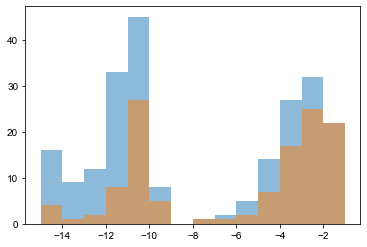

In [154]:
plt.figure()
plt.hist(np.concatenate(_cand_scores), bins=np.arange(-15,0), alpha=0.5)
plt.hist(np.array(_sel_scores), bins=np.arange(-15,0), alpha=0.5)
plt.show()

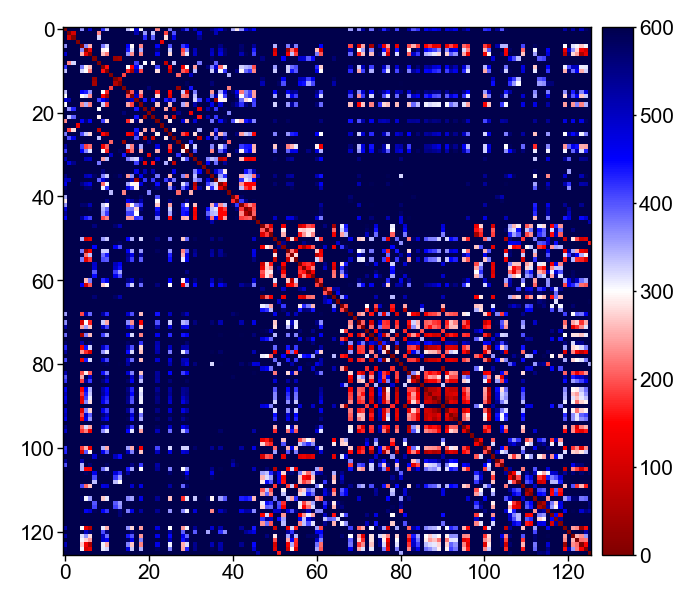

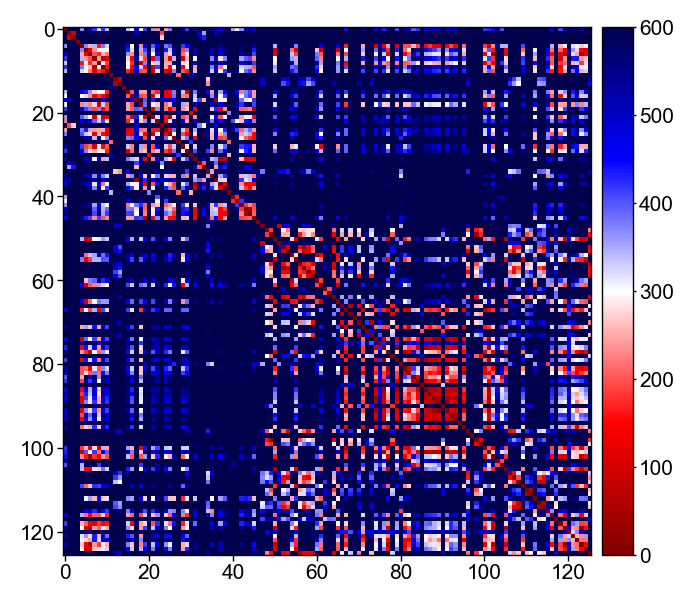

In [155]:
valid_inds = np.where(np.isnan(init_distmap).sum(1) < len(init_distmap)-1)[0]

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(init_distmap[valid_inds][:,valid_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
plt.show()

valid_inds = np.where(np.isnan(new_distmap).sum(1) < len(new_distmap)-1)[0]

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(new_distmap[valid_inds][:,valid_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
plt.show()

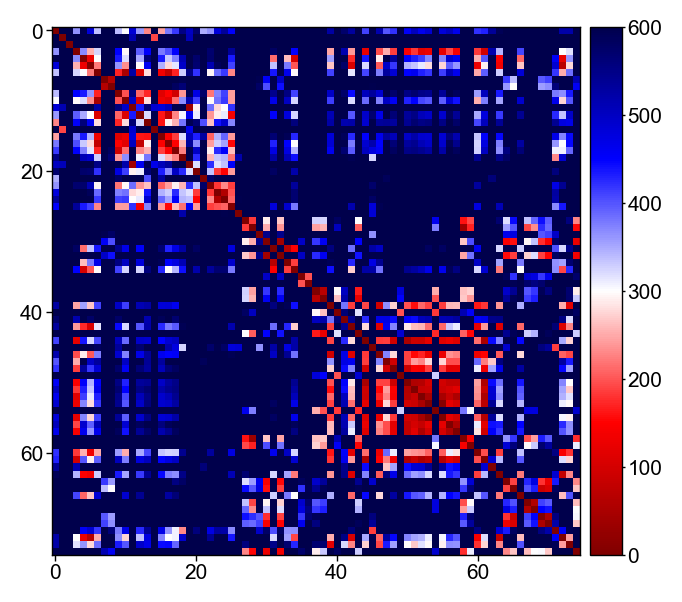

In [162]:
valid_inds = _sel_scores > -8

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(new_distmap[valid_inds][:,valid_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
plt.show()

### EM pick spots

+ iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.560s
-- collapse all regions into 1d.


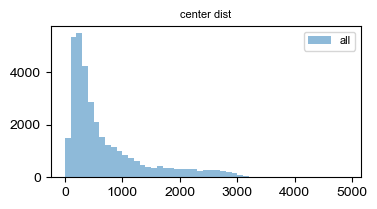

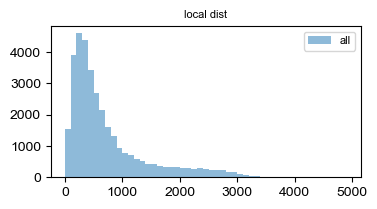

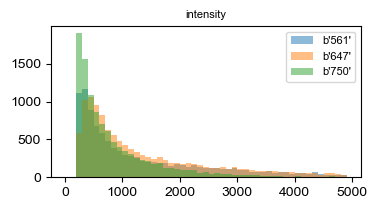

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.537s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.705s
-- region kept: 0.7907


C:\Users\puzheng\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


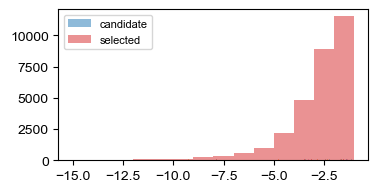

+ iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.582s
-- collapse all regions into 1d.


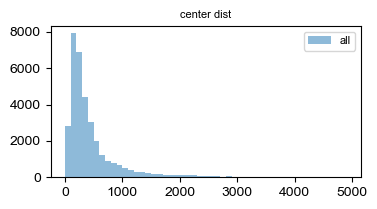

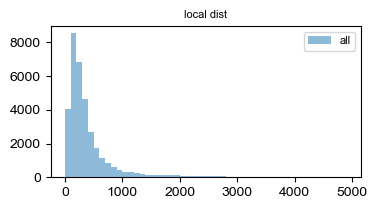

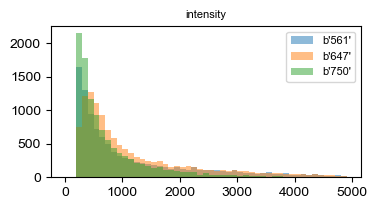

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.359s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.770s
-- region kept: 0.9443


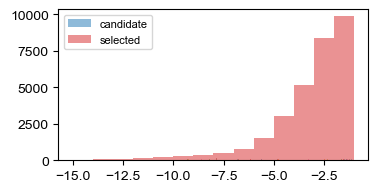

+ iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.404s
-- collapse all regions into 1d.


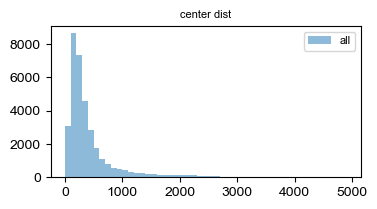

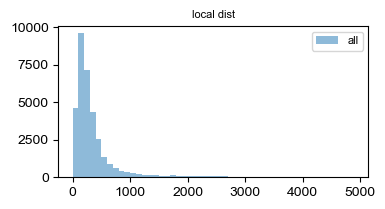

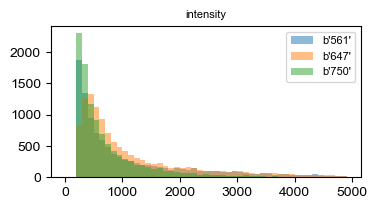

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.328s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.544s
-- region kept: 0.9807


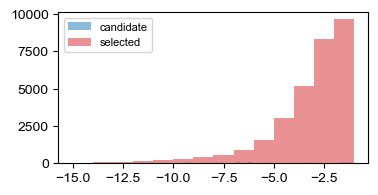

+ iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.471s
-- collapse all regions into 1d.


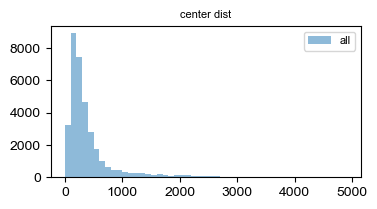

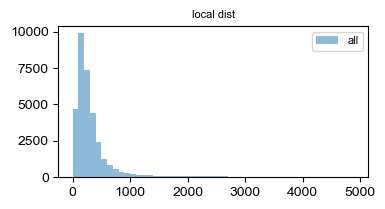

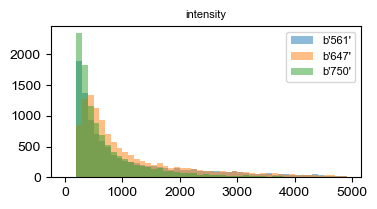

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.507s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.561s
-- region kept: 0.9899


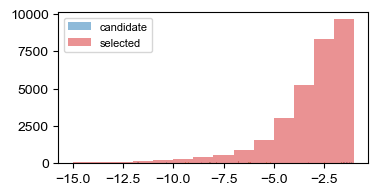

+ iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.649s
-- collapse all regions into 1d.


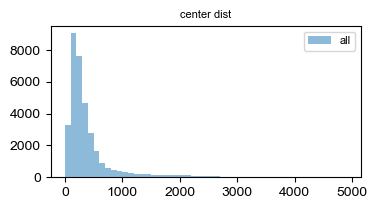

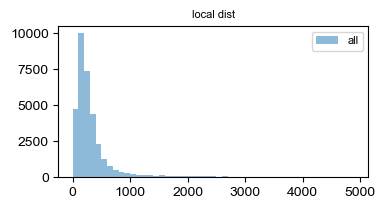

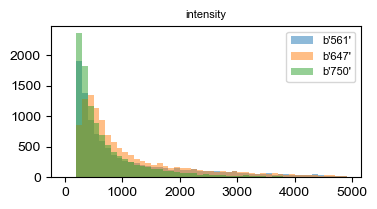

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.307s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.790s
-- region kept: 0.9937


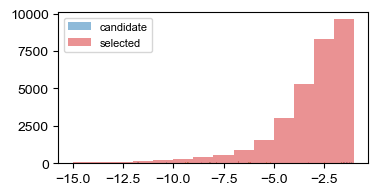

+ iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.421s
-- collapse all regions into 1d.


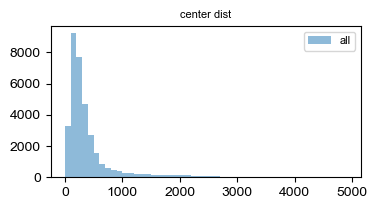

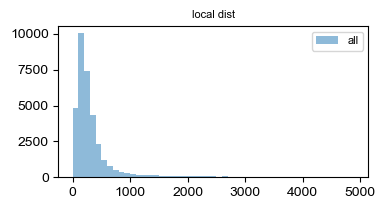

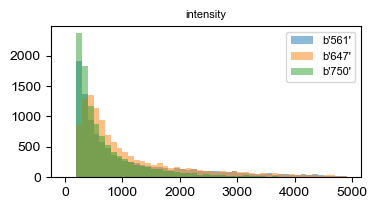

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.431s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.624s
-- region kept: 0.9953


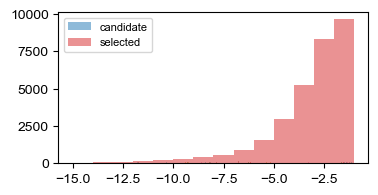

+ iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.588s
-- collapse all regions into 1d.


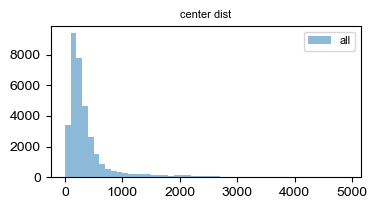

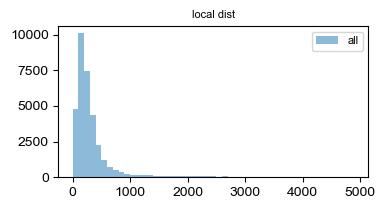

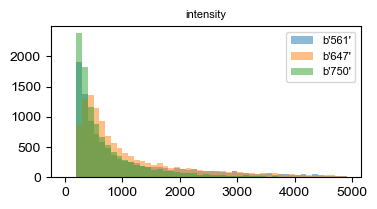

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.387s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.787s
-- region kept: 0.9968


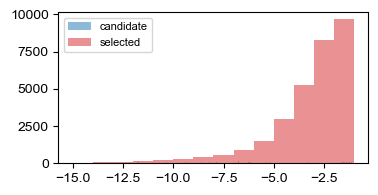

+ iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.429s
-- collapse all regions into 1d.


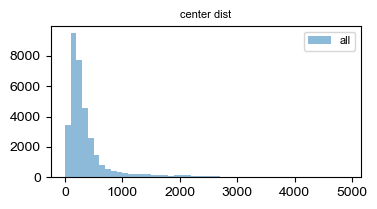

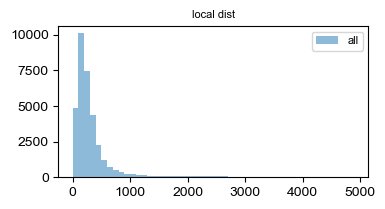

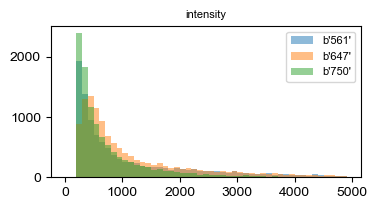

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.709s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.689s
-- region kept: 0.9977


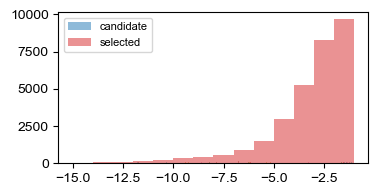

+ iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.534s
-- collapse all regions into 1d.


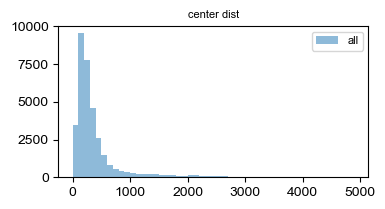

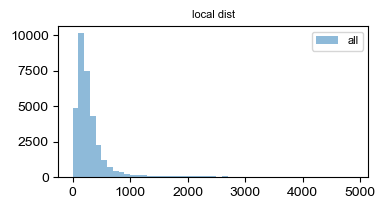

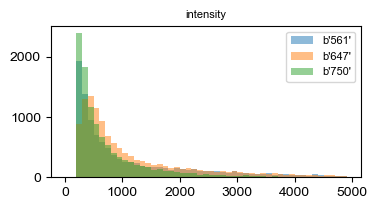

- start EM picking.
-- generate reference from initial picked spots.
-- Expectation step: generate reference metrics
-- multiprocessing process references with 32 threads, in 7.662s
-- collapse all regions into 1d.
-- multiprocessing maximization step with 32 threads, in 7.896s
-- region kept: 0.9984


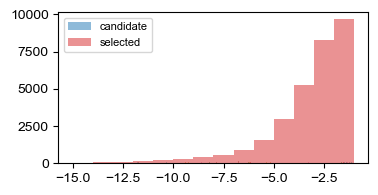

In [176]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities,pick_spots_by_scores

niter= 10
num_threads = 32
ref_chr_cts = None
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []

for _iter in range(niter):
    print(f"+ iter:{_iter}")
    # E: generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1], dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ct_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('center dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_local_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('local dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ints.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('intensity', fontsize=8)
    plt.show()
    
    # M: pick based on scores
    sel_hzxys_list, sel_scores_list, all_scores_list = pick_spots_by_scores(
        sel_dna_cand_hzxys_list, dna_reg_ids,
        cand_channels=dna_reg_channels, 
        ref_hzxys_list=sel_dna_hzxys_list[-1], ref_ids=dna_reg_ids, ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    # check updating rate
    update_rate = evaluate_differences(sel_hzxys_list, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    # append
    sel_dna_hzxys_list.append(sel_hzxys_list)
    sel_dna_scores_list.append(sel_scores_list)
    all_dna_scores_list.append(all_scores_list)
    
    plt.figure(figsize=(4,2), dpi=100)
    plt.hist(np.ravel([np.concatenate(_sel_scores) 
                       for _sel_scores in all_dna_scores_list[-1]]), 
             bins=np.arange(-15,0), alpha=0.5, label='candidate')
    plt.hist(np.ravel([np.array(_sel_scores) 
                       for _sel_scores in sel_dna_scores_list[-1]]), 
             bins=np.arange(-15,0), alpha=0.5, label='selected')
    plt.legend(fontsize=8)
    plt.show()
    
    if update_rate > 0.998:
        break

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 14.699s
-- collapse all regions into 1d.


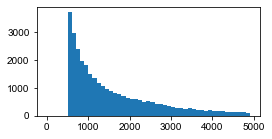

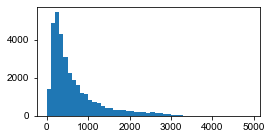

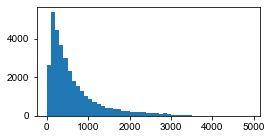

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 18.152s
-- region kept: 0.8825
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 14.474s
-- collapse all regions into 1d.


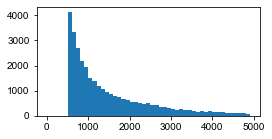

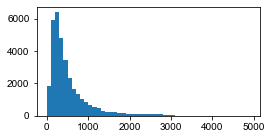

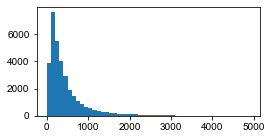

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 18.070s
-- region kept: 0.9760
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 14.579s
-- collapse all regions into 1d.


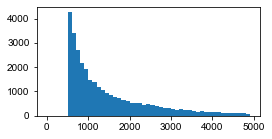

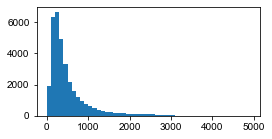

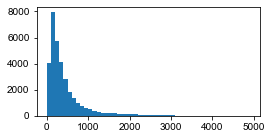

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 18.126s
-- region kept: 0.9929
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 14.443s
-- collapse all regions into 1d.


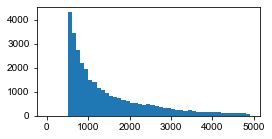

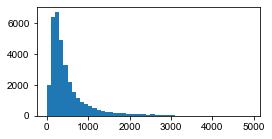

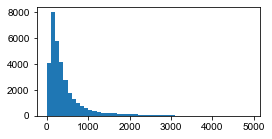

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 17.737s
-- region kept: 0.9969
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 14.592s
-- collapse all regions into 1d.


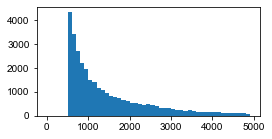

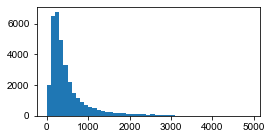

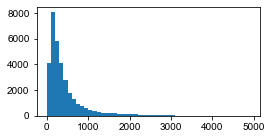

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 18.150s
-- region kept: 0.9983


In [222]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
num_threads = 32
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.998:
        break

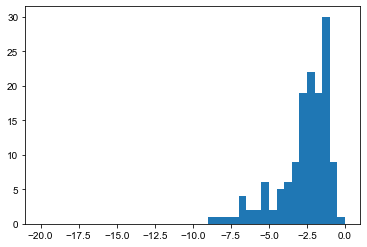

In [199]:
#scores = np.array(sel_dna_scores_list[-1])[np.isnan(sel_dna_scores_list[-1])==False]
scores = np.array(sel_dna_scores_list[-1][3])
plt.figure()
plt.hist(scores, 40, range=(-20,0))
plt.show()

In [201]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = -7
int_th = 300
bad_spot_percentage = 0.5

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    # remove spots by intensity
    _bad_inds = _kept_hzxys[:,0] < int_th
    # remove spots by scores
    _bad_inds += _scores < score_th
    #print(np.mean(_bad_inds))
    _kept_hzxys[_bad_inds] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
#kept_chrom_coords = np.array(sel_chrom_coords)[kept_chr_ids]
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

In [202]:
len(sel_chrom_coords)

297

0.21697154471544713


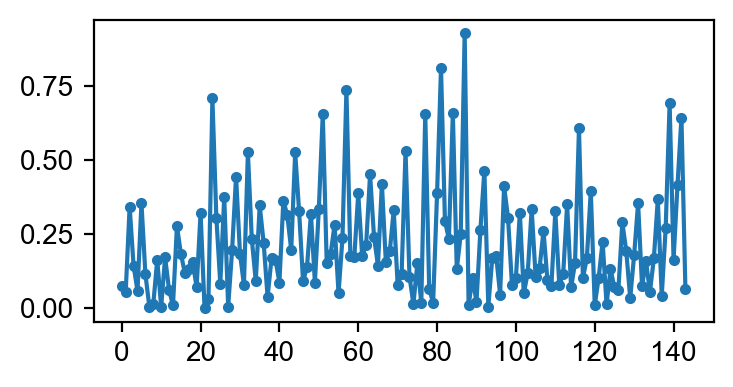

In [203]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_xticks(np.arange(0,150,20))
plt.show()

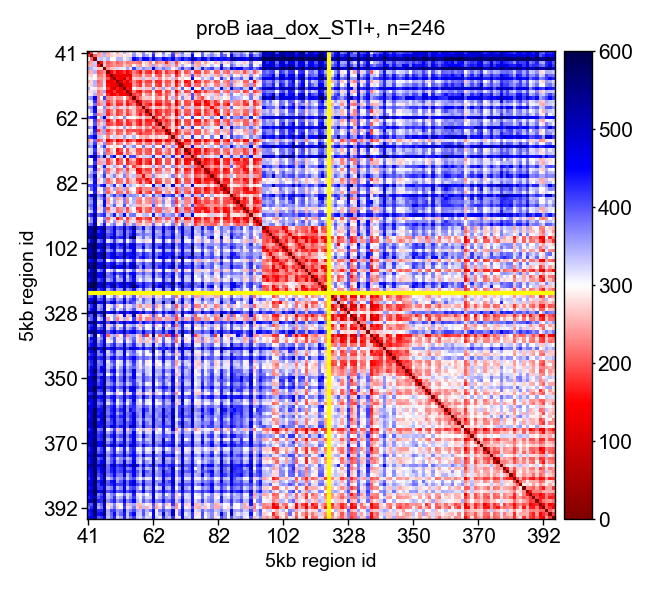

In [207]:
#kept_inds = np.where(loss_rates<0.5)[0]
kept_inds = np.arange(len(fov.unique_ids))

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"proB iaa_dox_STI+, n={len(distmap_list)}", fontsize=7.5)

_ticks = np.arange(0, len(kept_inds), 20)
ax.set_xticks(_ticks)
ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_xlabel(f"5kb region id", fontsize=7, labelpad=2)
ax.set_yticks(_ticks)
ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_ylabel(f"5kb region id", fontsize=7, labelpad=2)


ax.axvline(x=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
ax.axhline(y=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

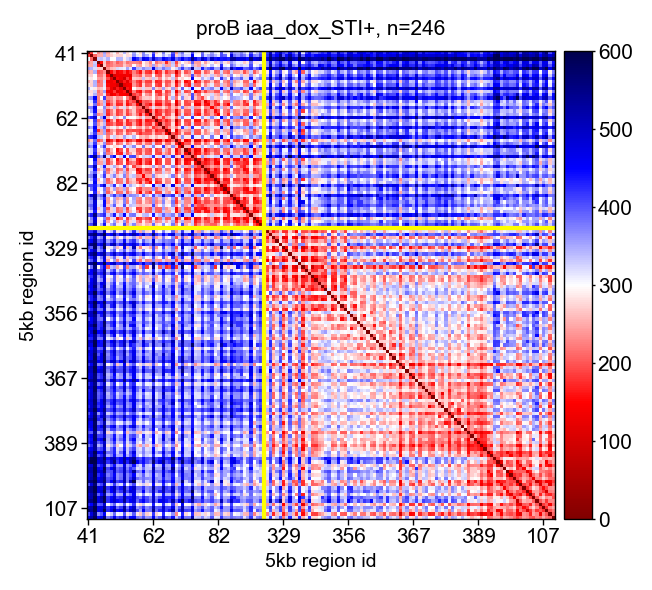

In [211]:
imaging_order = []
for _fd, _infos in fov.color_dic.items():
    for _info in _infos:
        if len(_info) > 0 and _info[0] == 'u':
            imaging_order.append(list(dna_reg_ids).index(int(_info[1:])))
imaging_order = np.array(imaging_order, dtype=np.int)

#kept_inds = np.where(loss_rates<0.5)[0]
kept_inds = imaging_order

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"proB iaa_dox_STI+, n={len(distmap_list)}", fontsize=7.5)

_ticks = np.arange(0, len(kept_inds), 20)
ax.set_xticks(_ticks)
ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_xlabel(f"5kb region id", fontsize=7, labelpad=2)
ax.set_yticks(_ticks)
ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_ylabel(f"5kb region id", fontsize=7, labelpad=2)


ax.axvline(x=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
ax.axhline(y=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

## visualize single example

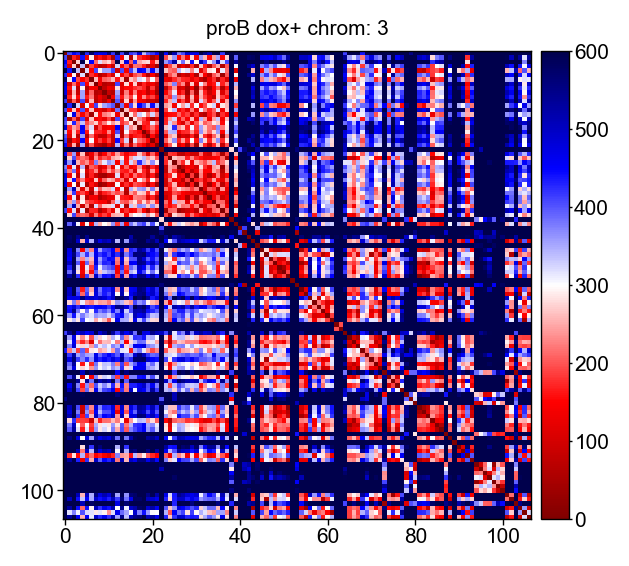

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x000001F72DFE1188>


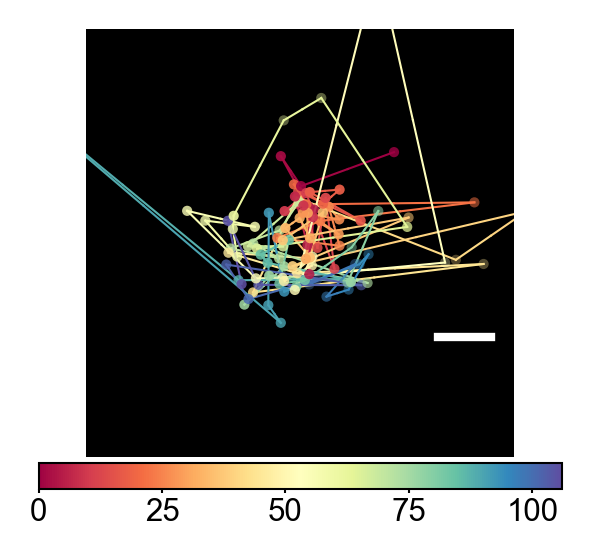

In [200]:
%matplotlib inline

reload(figure_tools.image)

chrom_id = 3

import matplotlib
import copy

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
#valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool)

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(
        distmap_list[chrom_id][valid_inds][:,valid_inds], 
        color_limits=[0,600],
        ax=ax,
        cmap=sc_cmap,
        ticks=np.arange(0,150,20), 
        figure_dpi=200)
ax.set_title(f"proB dox+ chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        marker_edge_line_width=0,
        reference_bar_length=200, image_radius=300, 
        line_width=0.5, figure_dpi=300, depthshade=True)
plt.show()

In [186]:
far_inds = np.where(np.array(local_dists) > 2000)[0]

In [231]:
np.array(chr_ct_dists)[far_inds]

array([2627.72396407, 2114.46728244, 1993.56426753, 2803.76727946])

(array([29., 36., 17., 15.,  6.,  4.,  3.,  0.,  2.,  1.]),
 array([ 20.613936  , 105.98437069, 191.35480537, 276.72524006,
        362.09567474, 447.46610943, 532.83654411, 618.2069788 ,
        703.57741349, 788.94784817, 874.31828286]),
 <BarContainer object of 10 artists>)

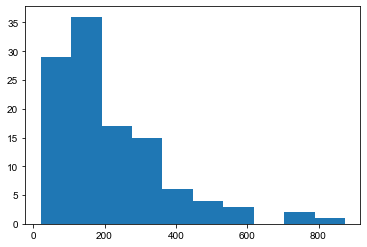

In [233]:
plt.figure()
plt.hist(local_dists)

In [188]:
_intensities[far_inds]

array([1110.17248535, 2081.35131836, 2035.73522949, 3164.23168945])

In [190]:
np.log(_scores[far_inds])

array([-3.79777712, -3.70512508, -3.70512508, -3.70512508])

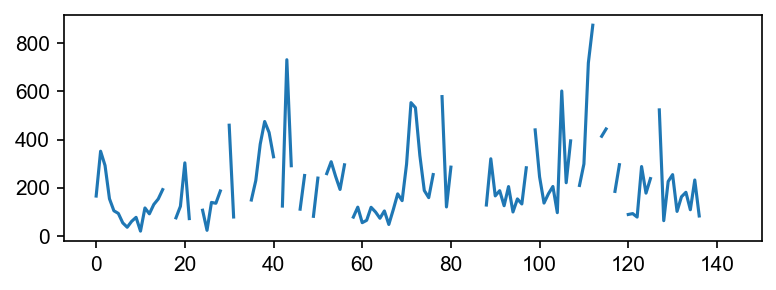

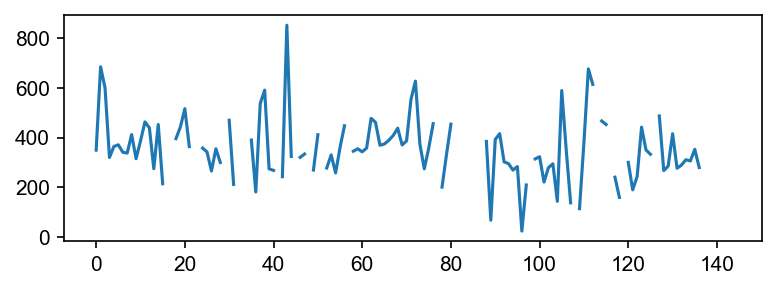

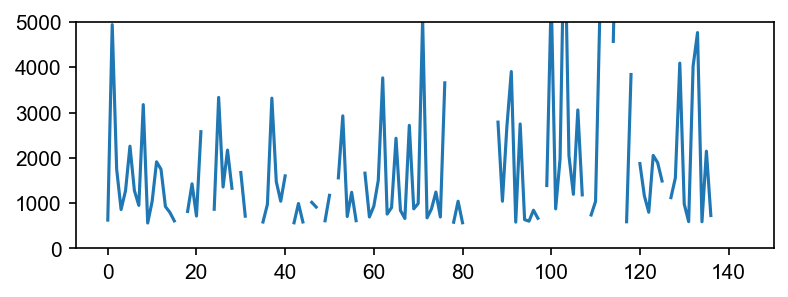

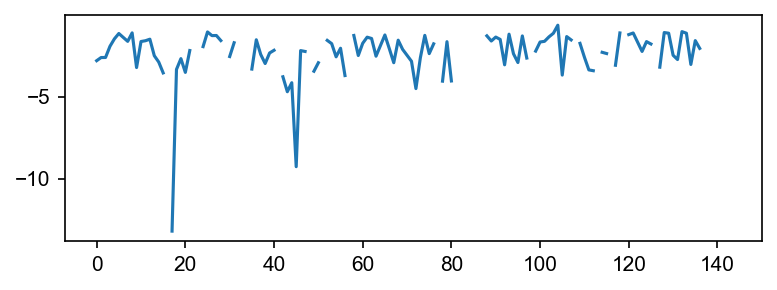

In [232]:
# calculate spot picking statistics
local_dists = spot_tools.picking.local_center_dists(final_dna_hzxys_list[chrom_id], dna_reg_ids, 
                                                    final_dna_hzxys_list[chrom_id], dna_reg_ids, neighbor_len=4)
plt.figure(figsize=(6,2), dpi=150)
plt.plot(local_dists)
plt.show()

# calculate spot picking statistics
reload(spot_tools.picking)
chr_ct_dists = spot_tools.picking.chromosome_center_dists(final_dna_hzxys_list[chrom_id], np.nanmean(final_dna_hzxys_list[chrom_id], axis=0), 
                                                         )
plt.figure(figsize=(6,2), dpi=150)
plt.plot(chr_ct_dists)
plt.show()

_intensities = final_dna_hzxys_list[chrom_id][:,0]
plt.figure(figsize=(6,2), dpi=150)
plt.plot(_intensities)
#plt.ylim([0, np.nanmax(final_dna_hzxys_list[chrom_id][:,0])])
plt.ylim([0,5000])
plt.show()

_scores = np.array(sel_dna_scores_list[-1])[kept_chr_ids][chrom_id]
plt.figure(figsize=(6,2), dpi=150)
plt.plot(np.log(_scores) )

plt.show()

In [153]:
len(np.log(np.array(sel_dna_scores_list[-1])[kept_chr_ids][chrom_id]))

144

C:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\picking.py:1640: RuntimeWarning: Mean of empty slice
  # conert into indices


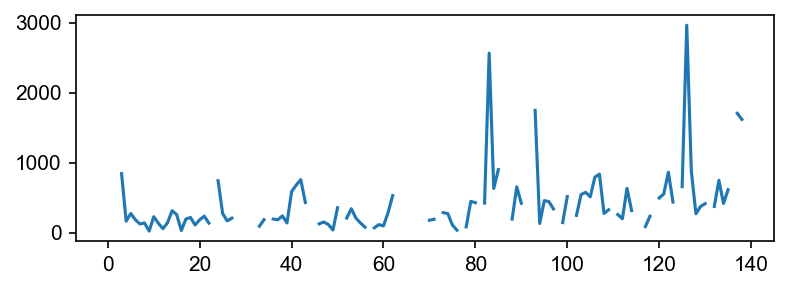

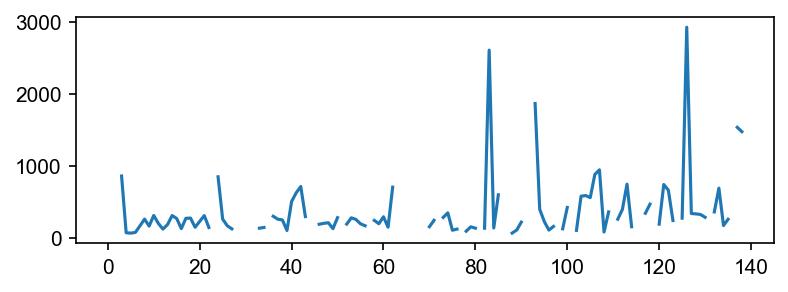

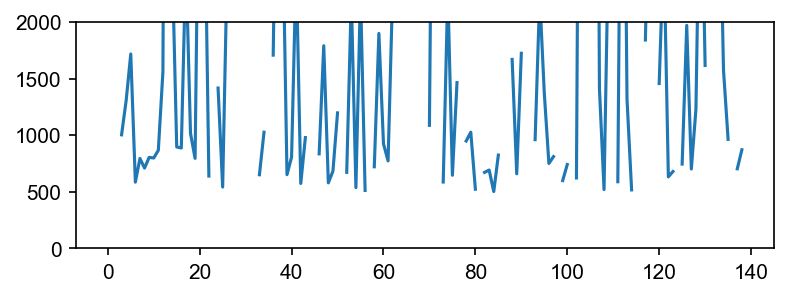

In [104]:
# calculate spot picking statistics
local_dists = spot_tools.picking.local_center_dists(sel_dna_hzxys_list[0][kept_chr_ids][chrom_id], dna_reg_ids, 
                                                    sel_dna_hzxys_list[0][kept_chr_ids][chrom_id], dna_reg_ids, neighbor_len=4)
plt.figure(figsize=(6,2), dpi=150)
plt.plot(local_dists)
plt.show()

# calculate spot picking statistics
reload(spot_tools.picking)
chr_ct_dists = spot_tools.picking.chromosome_center_dists(sel_dna_hzxys_list[0][kept_chr_ids][chrom_id], np.nanmean(sel_dna_hzxys_list[0][kept_chr_ids][chrom_id], axis=0), 
                                                         )
plt.figure(figsize=(6,2), dpi=150)
plt.plot(chr_ct_dists)
plt.show()

plt.figure(figsize=(6,2), dpi=150)
plt.plot(sel_dna_hzxys_list[0][kept_chr_ids][chrom_id][:,0])
#plt.ylim([0, np.nanmax(sel_dna_hzxys_list[0][kept_chr_ids][chrom_id][:,0])])
plt.ylim([0,2000])
plt.show()


### check scores

In [216]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import cum_val

In [217]:
local_scores = np.array([1-cum_val(ref_local_dists, _ld) for _ld in local_dists])
ct_scores = np.array([1-cum_val(ref_ct_dists, _ld) for _ld in chr_ct_dists])

In [218]:
local_scores[far_inds]

array([0.01560457, 0.03477589, 0.03120913, 0.00671739])

In [219]:
ct_scores[far_inds]

array([0.01299663, 0.0350524 , 0.04162473, 0.00704601])

In [221]:
local_scores

array([0.13607181, 0.32380216, 1.        , 0.01560457, 0.29610034,
       0.4745274 , 0.35513019, 0.31744145, 0.98240399, 1.        ,
       0.98169064, 1.        , 1.        , 0.92622756, 0.27707764,
       1.        , 0.27003329, 0.03477589, 0.22226846, 0.12980026,
       1.        , 0.30112353, 0.85955891, 1.        , 0.7503864 ,
       0.77633456, 0.59353822, 0.5474676 , 1.        , 0.4418024 ,
       0.24904886, 0.25193199, 0.32852812, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.16829152,
       0.19426941, 1.        , 0.27425395, 0.33783141, 1.        ,
       1.        , 0.93885983, 0.79167162, 0.95392938, 1.        ,
       0.99245036, 1.        , 1.        , 1.        , 1.        ,
       0.8619962 , 0.8619962 , 1.        , 1.        , 1.        ,
       1.        , 0.08803947, 1.        , 0.08078706, 1.        ,
       0.03120913, 1.        , 1.        , 1.        , 1.        ,
       0.94409107, 0.94409107, 1.        , 1.        , 0.86455

In [ ]:
# ref_ct_dists, ref_local_dists, ref_ints
spot_tools.picking._maximize_score_spot_picking_of_chr(_)

## visualize all fitted spots

In [91]:
cand_chr_spots_list[0][1].mean(0)

array([ 2.7823398e+02,  3.6345139e+00,  2.4295246e+01,  1.0203707e+03,
        6.2871539e+02,  2.5193291e+00,  3.3943014e+00,  1.8683887e+00,
        0.0000000e+00, -7.9286888e-02,  4.2638550e+01], dtype=float32)

In [15]:
vis_inds = [0,1,2]
vis_ims, vis_ids, vis_spot_list, vis_raw_spot_list = [], [], [], []
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _raw_spot_list = [_spots[_spots[:,0] > 0] for _spots in _grp['raw_spots'][:]]
    _spot_list = [_spots[_spots[:,0] > 0] for _spots in _grp['spots'][:]]
    
    for _ind in vis_inds:
        vis_ims.append(_grp['ims'][_ind])
        vis_ids.append(_grp['ids'][_ind])
        vis_spot_list.append(_spot_list[_ind])
        vis_raw_spot_list.append(_raw_spot_list[_ind])

In [22]:
# trace back selected spots
_chrom_id = 1
final_dna_hzxys_list[_chrom_id]

NameError: name 'final_dna_hzxys_list' is not defined

<IPython.core.display.Javascript object>


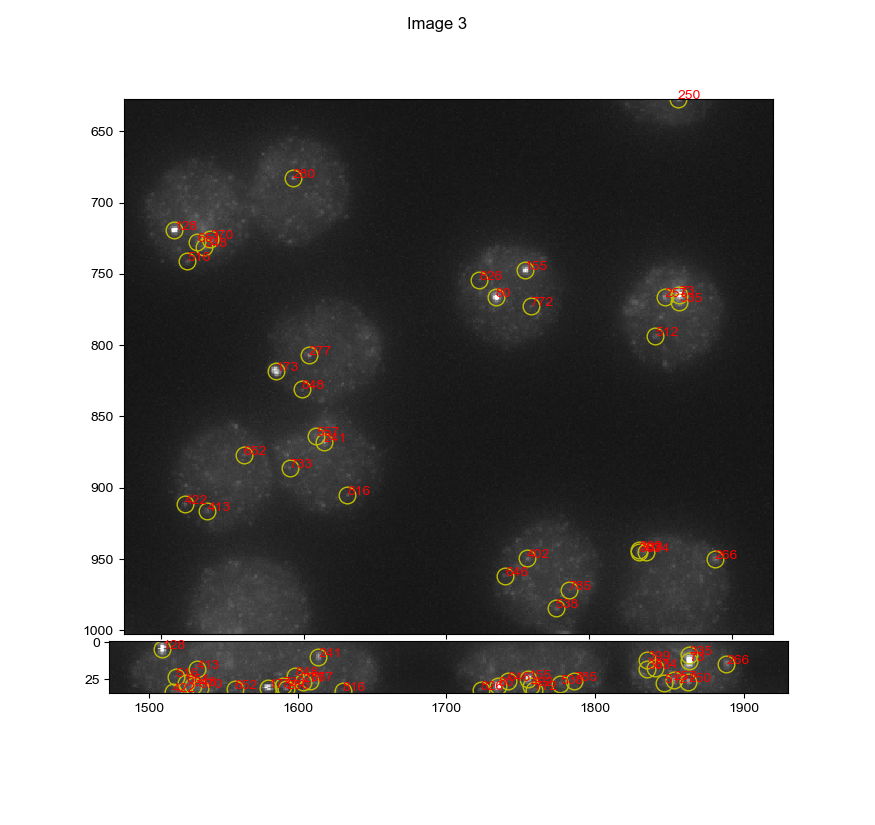

In [21]:
%matplotlib notebook
%matplotlib notebook
int_th = 300

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_raw_spot_list):
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _spots[_spots[:,0] > int_th])
    coord_dict['class_ids'] += list(_i * np.ones(len(_spots[_spots[:,0] > int_th]),dtype=np.int))
    

visual_tools.imshow_mark_3d_v2(vis_ims, 
                               given_dic=coord_dict,
                               save_file=None,
                               )


<IPython.core.display.Javascript object>


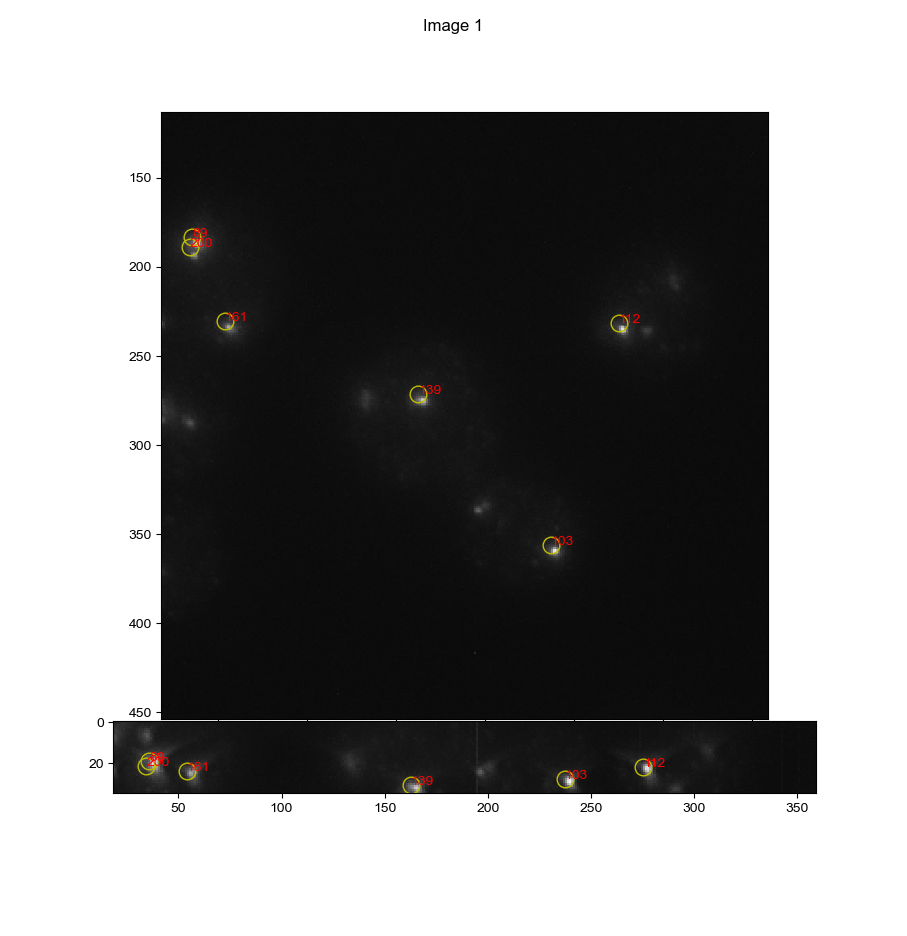

In [9]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(sel_spot_list):
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _spots[:200])
    coord_dict['class_ids'] += list(_i * np.ones(len(_spots[:200]),dtype=np.int))
    

visual_tools.imshow_mark_3d_v2(sel_ims, 
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [57]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _unique_chs = np.array([int(_ch) for _ch in _grp['channels'][:]])

In [63]:
intensity_dict = {}
for _ch in np.unique(_unique_chs):
    _ints = np.array(final_dna_hzxys_list)[:,np.where(_unique_chs==_ch)[0],0]
    intensity_dict[_ch] = _ints[np.isnan(_ints)==False]

In [ ]:
plt.figure()
for _ch, _ints in intensity_dict.items():
    plt.hist(_ints, bins=np.arange(0,5000,100), 
             alpha=0.3, label=f"{_ch}", density=True)
plt.legend()
plt.show()

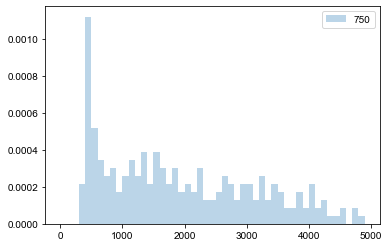

In [84]:
plt.figure()
plt.hist(np.array(final_dna_hzxys_list)[:,26,0], bins=np.arange(0,5000,100), 
         alpha=0.3, label=f"{_ch}", density=True)
plt.legend()
plt.show()